# Import pacakage

In [10]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision

import numpy as np
import matplotlib.pyplot as plt

# Setting 

In [11]:
# Settings
epochs = 10
lr = 0.008

# DataLoader
train_set = torchvision.datasets.MNIST(
    root='../mnist',
    train=True,
    download=False,
    transform=torchvision.transforms.ToTensor(),
)

test_set = torchvision.datasets.MNIST(
    root='../mnist',
    train=False,
    download=False,
    transform=torchvision.transforms.ToTensor(),
)

train_loader = data.DataLoader(train_set, batch_size= 128, shuffle=True)
test_loader = data.DataLoader(test_set, batch_size=8, shuffle=False)

# Model structure

In [17]:
# AutoEncoder (Encoder + Decoder)
class AutoEncoder(nn.Module):
    '''
    MNISR image shape = (1,28,28)
    784 = 28*28 
    '''
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            # L1
            nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1)),  # (b, 16, 10, 10)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),  # (b, 16, 5, 5)
            # L2
            nn.Conv2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)),  # (b, 8, 3, 3)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=0)  # (b, 8, 2, 2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            # L2t
            nn.ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(2, 2)),  # (b, 16, 5, 5)
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1)),  # (b, 8, 15, 15)
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1)),  # (b, 1, 28, 28)
            nn.Sigmoid()
        )

    def forward(self, inputs):
        codes = self.encoder(inputs)
        decoded = self.decoder(codes)

        return codes, decoded

# Optimizer and loss function

In [18]:
#  use gpu if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = AutoEncoder().to(device)

# Optimizer and loss function
model = AutoEncoder()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.MSELoss()

In [19]:
model

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(8, 1, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (5): Sigmoid()
  )
)

# Training

In [20]:
for data, labels in train_loader:
    print(data.shape,labels.shape)
    break

torch.Size([128, 1, 28, 28]) torch.Size([128])


In [21]:
# Train
for epoch in range(epochs):
    for data, labels in train_loader:
        inputs = data.view(-1, 1, 28, 28)

        # Forward
        codes, decoded = model(inputs)

        # Backward
        optimizer.zero_grad()
        loss = loss_function(decoded, inputs)
        loss.backward()
        optimizer.step()

    # Show progress
    print('[{}/{}] Loss:'.format(epoch+1, epochs), loss.item())

[1/10] Loss: 0.043190065771341324
[2/10] Loss: 0.03693019598722458
[3/10] Loss: 0.03625675290822983
[4/10] Loss: 0.03420083597302437
[5/10] Loss: 0.03217336907982826
[6/10] Loss: 0.03185541182756424
[7/10] Loss: 0.03267591819167137
[8/10] Loss: 0.03010345995426178
[9/10] Loss: 0.028235040605068207
[10/10] Loss: 0.031336236745119095


# Save Model

In [24]:
# Save
torch.save(model, '../models/conv_autoencoder.pth')

# Import Model

In [25]:
# Load model
model = torch.load('../models/conv_autoencoder.pth')
model.eval()
print(model)

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(8, 1, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (5): Sigmoid()
  )
)


# Plot 

Original image


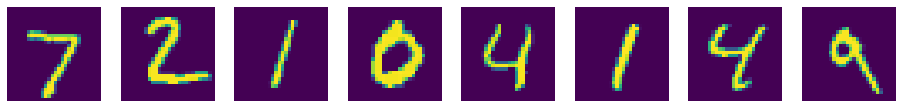

Decode image


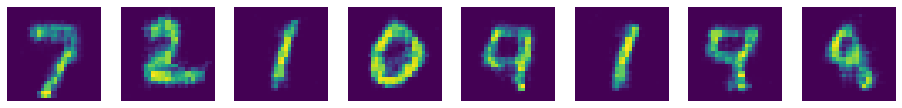

In [26]:
# def images_show(images_lst):
#     '''Show images
#     auto count the size
#     '''
#     sqrtn = int(np.ceil(np.sqrt(images_lst.shape[0])))

#     for index, image in enumerate(images_lst):
#         plt.subplot(sqrtn, sqrtn, index+1)
#         plt.imshow(image.reshape(28, 28))
#         plt.axis('off')

        
def images_setting(images_lst):
    '''Show images
    manual size setting
    '''
    plt.figure(figsize=(20,10))
    
    for index, image in enumerate(images_lst):
        plt.subplot(5, 10, index+1)
        plt.imshow(image.reshape(28, 28))
        plt.axis('off')
        
    plt.show()

    
# Test
with torch.no_grad():
    for data in test_loader:
        # plot input image
        print("Original image")
        inputs = data[0].view(-1, 1, 28, 28)
        images_setting(inputs)

        # plot output image
        print("Decode image")
        code, outputs = model(inputs)
        images_setting(outputs)
        break

# Visualization with Internal Representaion (bottleneck)

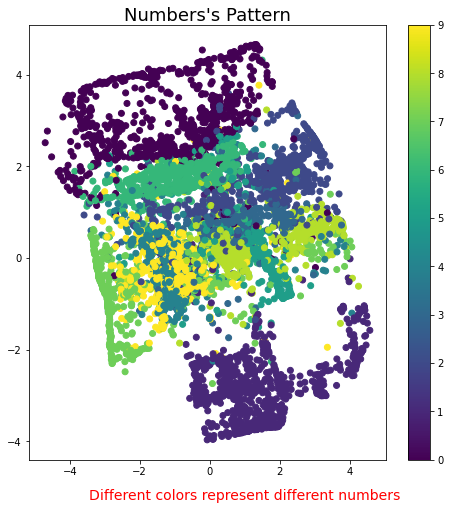

In [37]:
plt.figure(figsize=(8,8))

axis_x = []
axis_y = []
answers = []
with torch.no_grad():
    for data in test_loader:
        inputs = data[0].view(-1, 28*28)
        answers += data[1].tolist()

        # code is the Internal Representation
        # which is redunction to 2 dimension
        code, outputs = model(inputs)
        axis_x += code[:, 0].tolist()
        axis_y += code[:, 1].tolist()
        break 


plt.title("Numbers's Pattern", fontsize=18, ha="center", va="top")
plt.figtext(0.5,0.05, "Different colors represent different numbers", ha="center", va="bottom", fontsize=14, color="r")
plt.scatter(axis_x, axis_y, c=answers)
plt.colorbar()
plt.show()

# Feed a random sample to decoder

In [ ]:
code = Variable(torch.FloatTensor([[1.19, -3.36]]))
decode = model.decoder(code)

# transform back to (1,1,28,28) and then squeeze to (1,28,28)
decode_img = decode.view(1, 1, 28, 28)
decode_img = decode_img.squeeze()

# transfrom to numpy format 
decode_img = decode_img.data.numpy()

# plot show
plt.imshow(decode_img)
plt.show()

# References

- Implementing an Autoencoder in PyTorch    
    https://medium.com/pytorch/implementing-an-autoencoder-in-pytorch-19baa22647d1
- Kaggle:Autoencoders with PyTorch    
    https://www.kaggle.com/jagadeeshkotra/autoencoders-with-pytorch
- https://www.kaggle.com/ljlbarbosa/convolution-autoencoder-pytorch
- https://discuss.pytorch.org/t/autoencoders-in-pytorch/844


# Read More
使用 PyTorch 搭建 GAN 模型產生 MNIST 圖片
- https://clay-atlas.com/blog/2020/01/09/pytorch-chinese-tutorial-mnist-generator-discriminator-mnist/